# Visualizing Monetary Policy

In [19]:
! pip install pandas-datareader

In [31]:
import os
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt


start = datetime.datetime(1948, 1,1)
end = datetime.datetime.today()

# download data:
df = web.DataReader("GDPC1", "fred", start, end).resample("Q").mean()
df

,GDPC1
DATE,
1948-03-31,2087.442
1948-06-30,2121.899
1948-09-30,2134.056
1948-12-31,2136.440
1949-03-31,2107.001
...,...
2021-12-31,20006.181
2022-03-31,19924.088
2022-06-30,19895.271


<AxesSubplot:xlabel='DATE'>

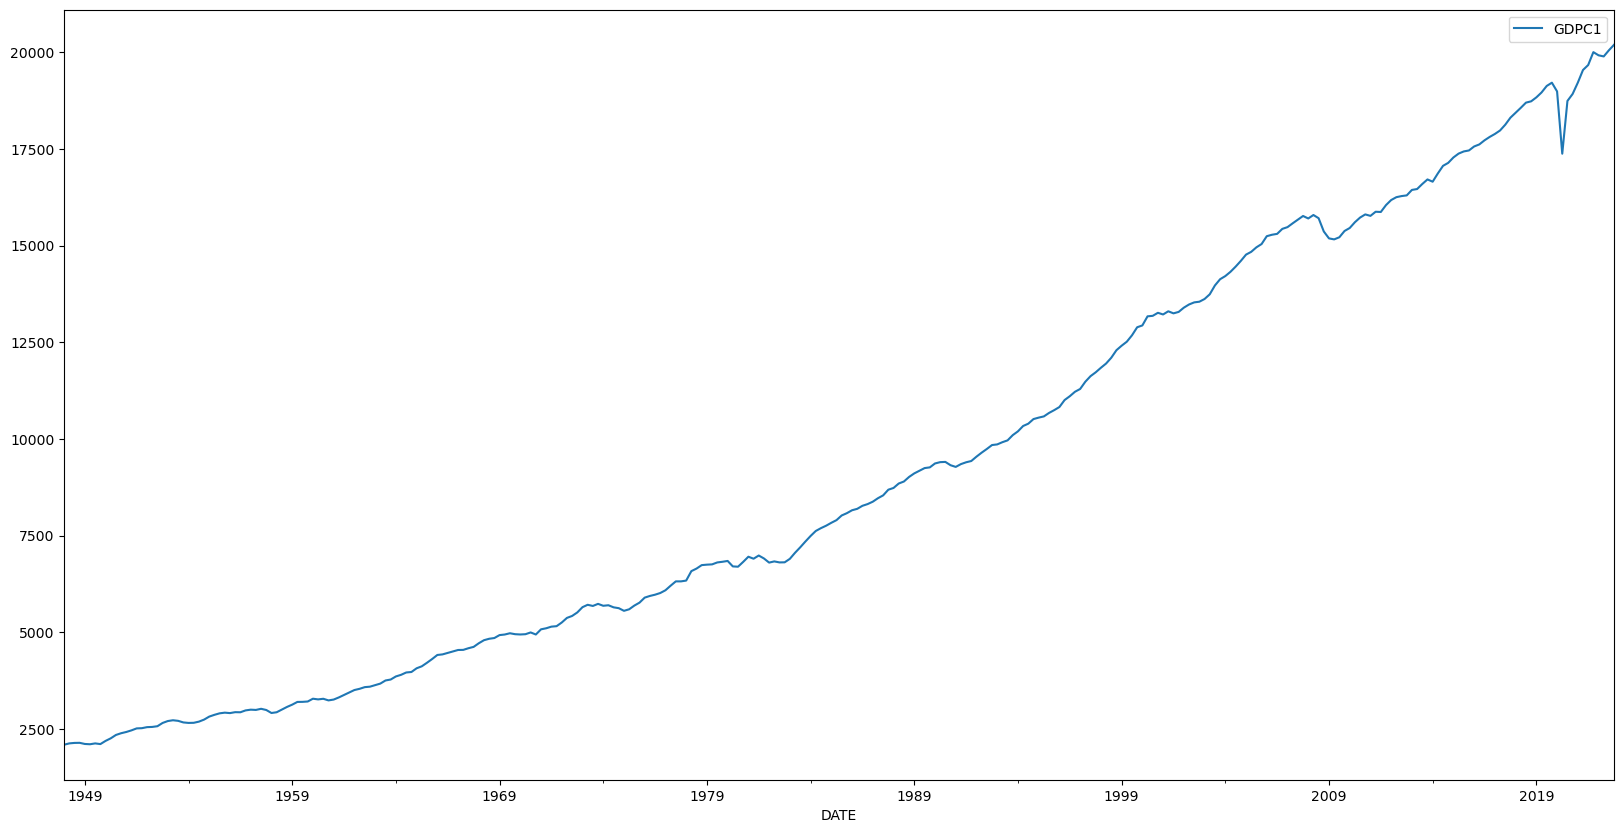

In [32]:
df.plot.line(figsize = (20,10))

In [35]:
# create a system:
def gather_data(data_codes,
               start,
                # default end to today:
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
                # resample to desired frequency and take the mean
                code, "fred", start, end).resample(freq).mean() # alts: .first() or .last() or .median ...
            # rename columns to code:key
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(
                code, "fred", start, end).resample(freq).mean()
            
    return df
            

In [36]:
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                   # set frequency to weekly
                  freq = "W")

In [52]:
data["Base: Currency in Circulation"] = data["Base: Currency in Circulation"].mul(1000)

In [51]:
# last year because data is weekly
data.iloc[-52:]

,Base: Total,Base: Currency in Circulation
DATE,,
2019-09-22,3159026.0,1.762096e+15
2019-09-29,3159026.0,1.761662e+15
2019-10-06,3252373.0,1.762796e+15
2019-10-13,3252373.0,1.766295e+15
2019-10-20,3235853.0,1.770761e+15
2019-10-27,3235853.0,1.771533e+15
2019-11-03,3282965.0,1.776039e+15
2019-11-10,3282965.0,1.782249e+15
2019-11-17,3311715.0,1.786866e+15


## Breaking down the Federal Reserve's balance sheet

<AxesSubplot:xlabel='DATE'>

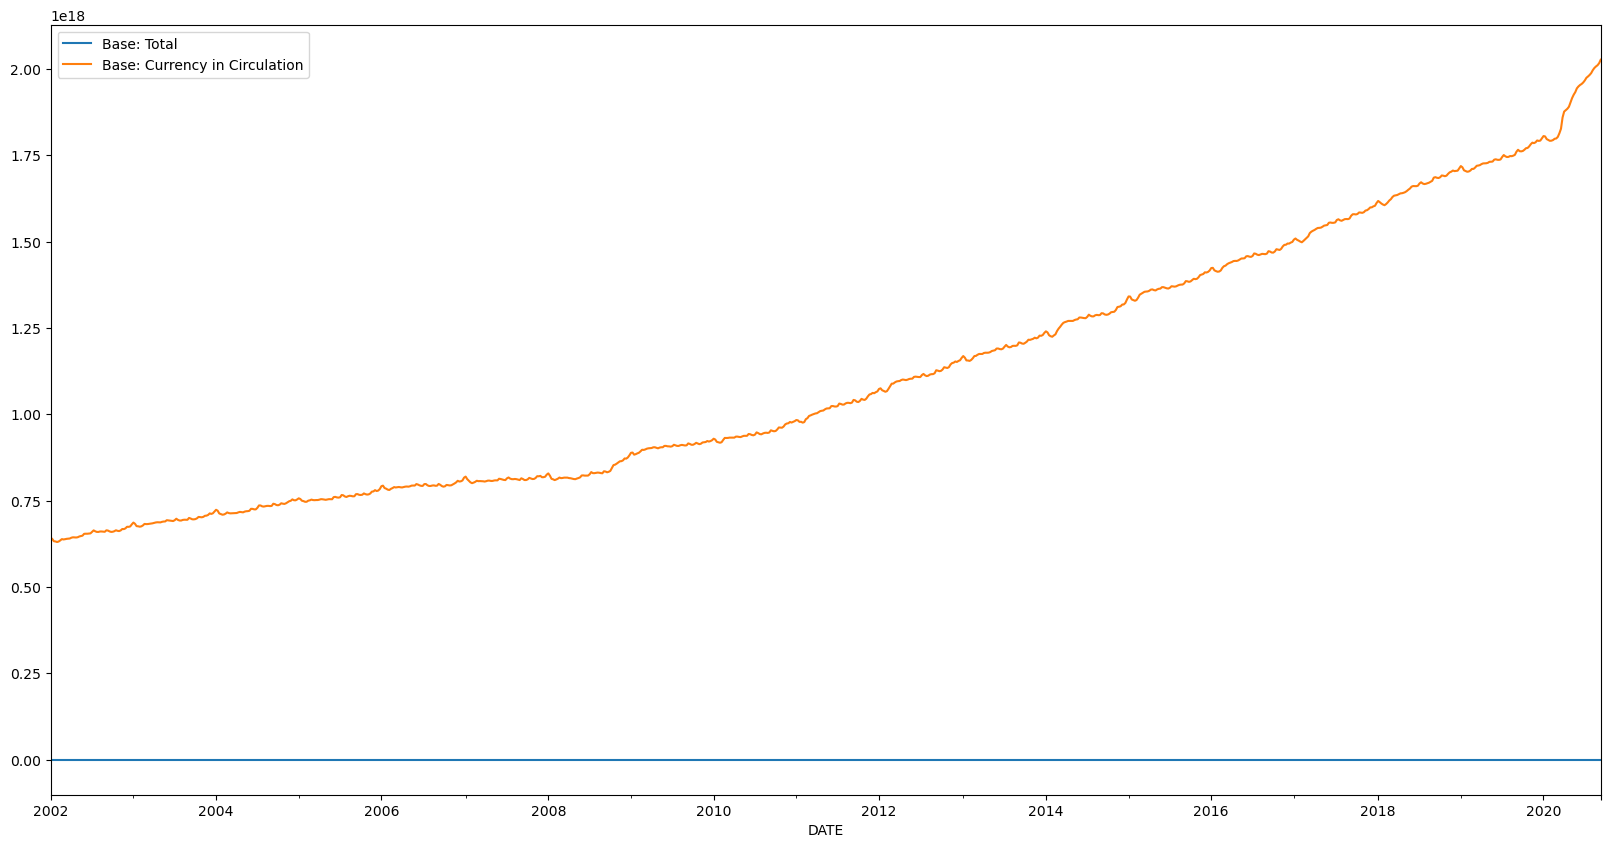

In [54]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax)

<AxesSubplot:xlabel='DATE'>

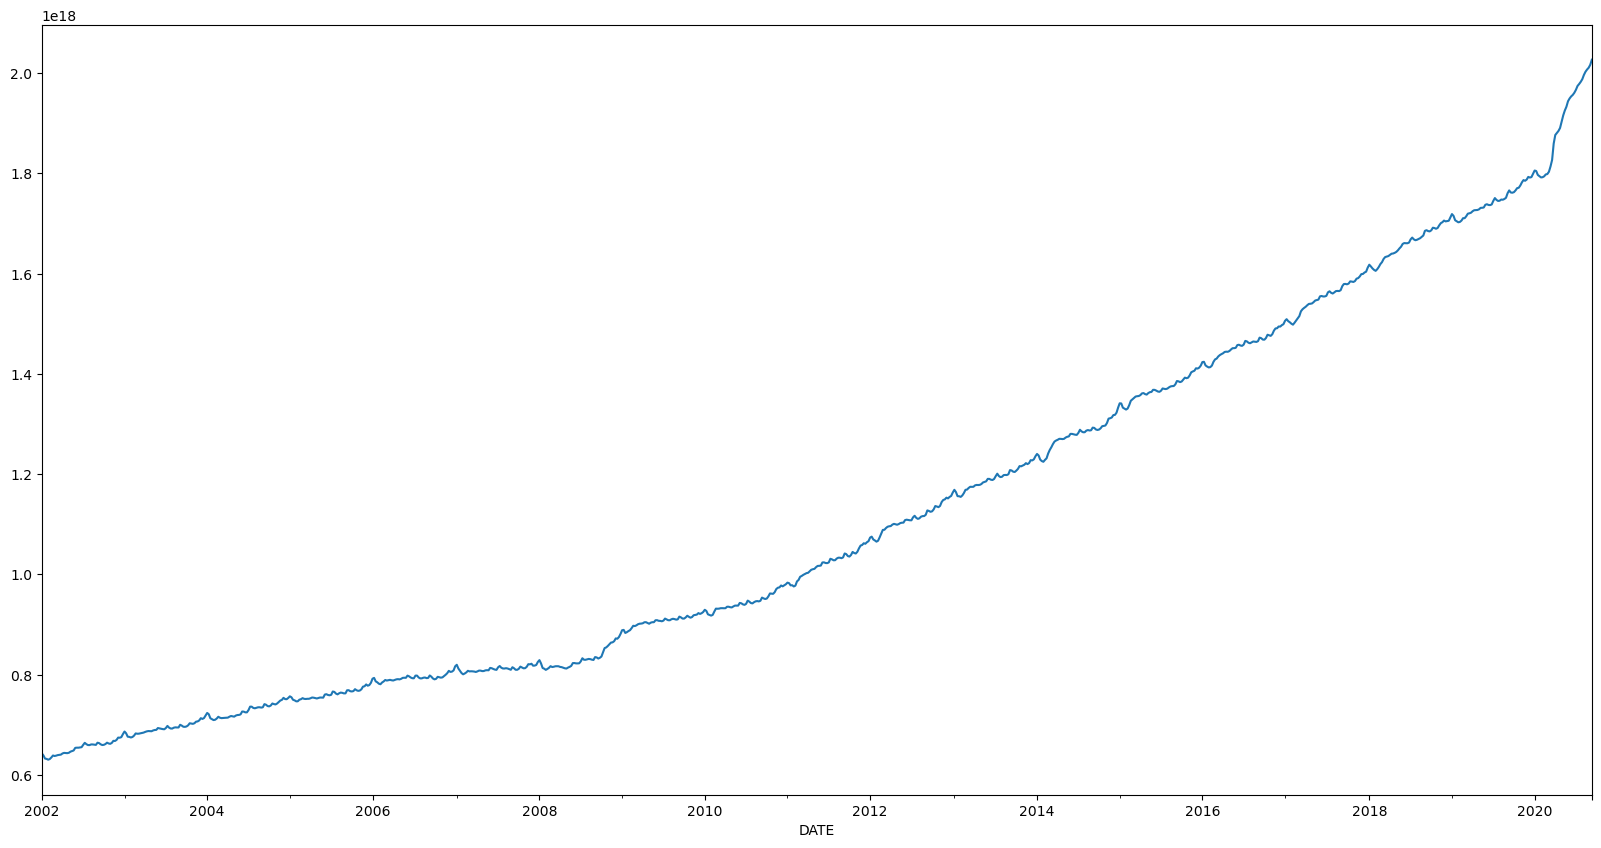

In [55]:
fig, ax = plt.subplots(figsize = (20,10))
data["Base: Currency in Circulation"].plot.line(ax = ax)

In [57]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
              }
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "W")

               

<AxesSubplot:xlabel='DATE'>

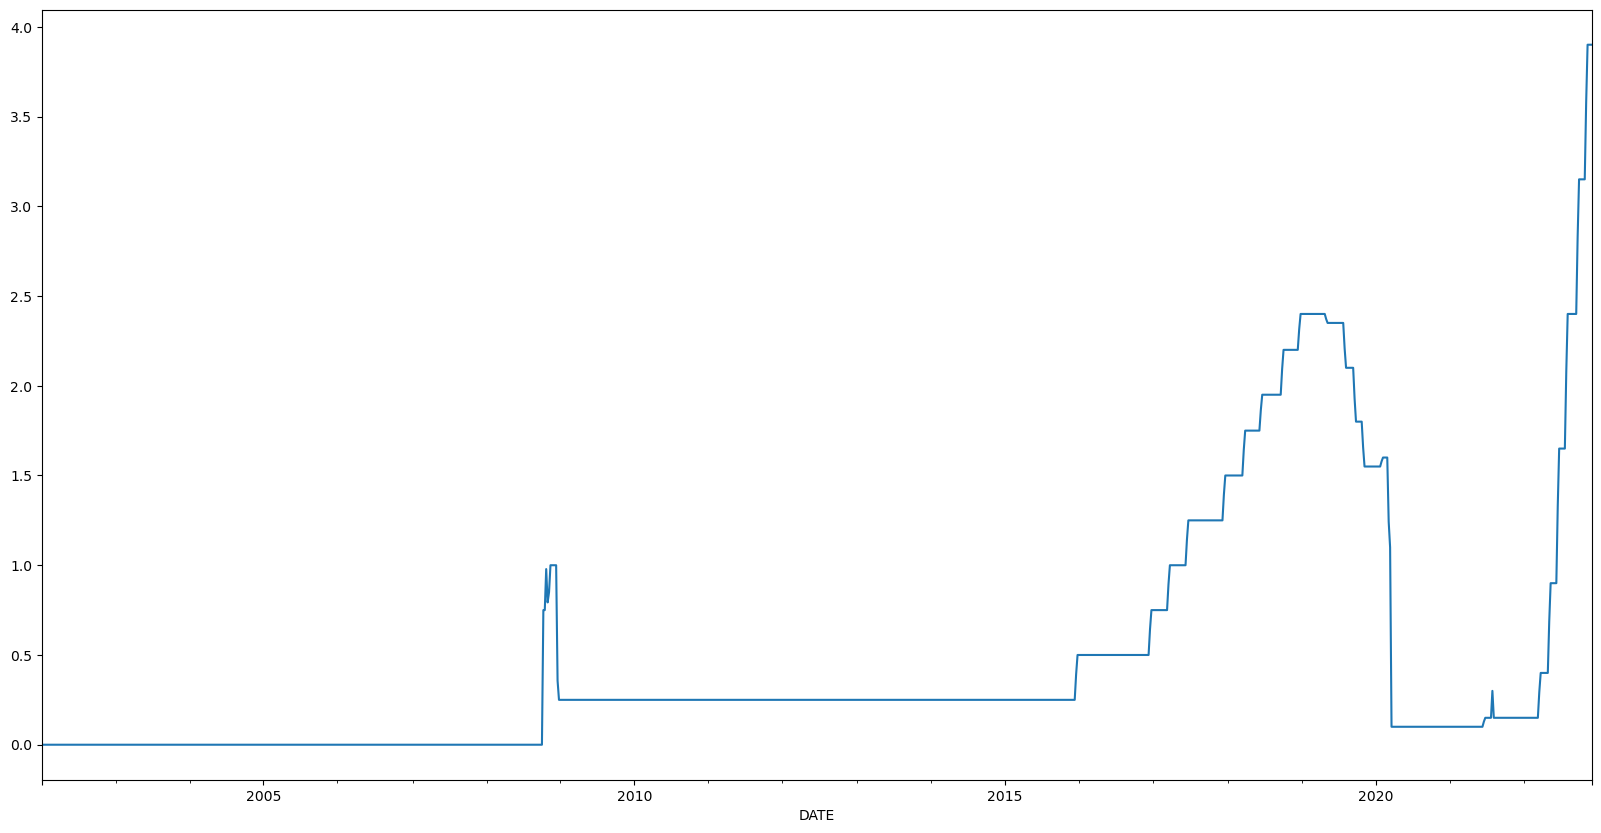

In [63]:
fig, ax = plt.subplots(figsize = (20,10))
plot_data= data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
plot_data = plot_data.fillna(0)
# sum columns:
plot_data = plot_data.sum(axis = 1)
plot_data.plot.line(ax = ax)

#data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(
    #data["Interst on Reserve Balances"])

In [68]:
plot_data = data[["Interest on Reserve Balances","Interest on Excess Reserves"]]
match = plot_data[plot_data["Interest on Reserve Balances"] == ["Interest on Excess Reserves"]]
match_date = match.index
match_val = match.sum() / 2
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis = 1)
plot_data.loc[match_date] = 0.15

ValueError: ('Lengths must match to compare', (1092,), (1,))

<AxesSubplot:xlabel='DATE'>

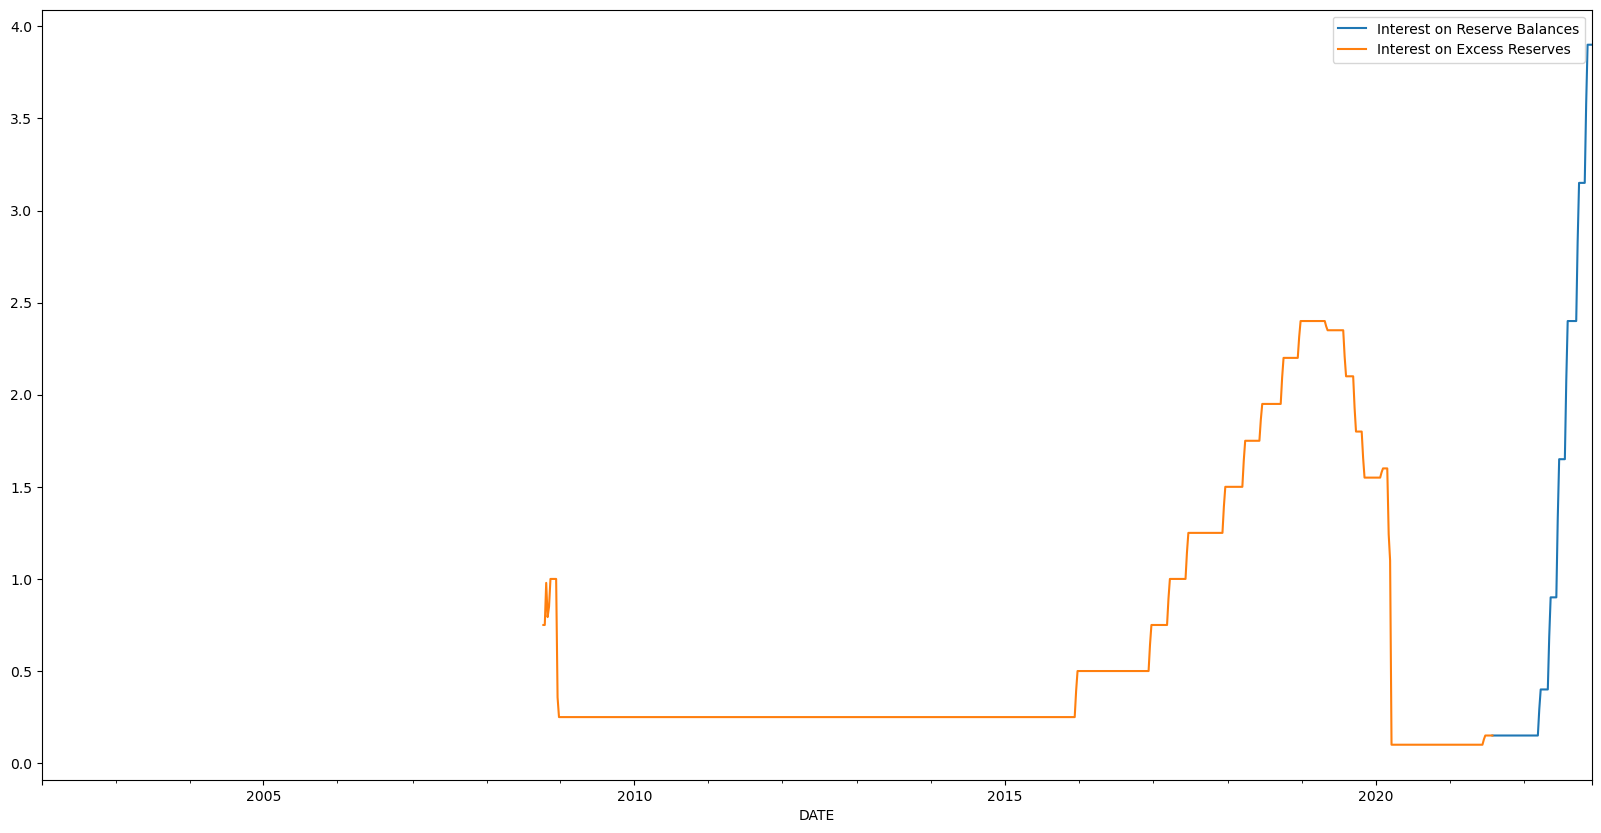

In [67]:
fig, ax = plt.subplots(figsize = (20,10))

plot_data.plot.line(ax = ax)